## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [80]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import datetime as dt
import requests
from collections import Counter
import pickle

import os
API_key = os.environ.get('WWO_API_key')

In [81]:
params = {'user' : 'lhl_student',
          'password' : 'lhl_student',
          'host' : 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
          'port' : '5432',
          'database' : 'mid_term_project'
         }

def open_connection(params):
    try:
        connection = psycopg2.connect(**params)
        cursor = connection.cursor()
        print("Connection was successful")
    except psycopg2.Error as e:
        print(f"The following error '{e}' occurred.")
        
    return connection, cursor

In [82]:
connection, cursor = open_connection(params)

query1 = 'SELECT * FROM flights ORDER BY random() LIMIT 1500;'
query2 = "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'flights';"

cursor.execute(query1)
data = cursor.fetchall()

cursor.execute(query2)
columns = cursor.fetchall()

connection.close()
print('Connection closed normally')

Connection was successful
Connection closed normally


In [83]:
columns = [col[0] for col in columns]
columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [84]:
df = pd.DataFrame(data, columns=columns)
df.dropna(subset=['arr_delay'], inplace=True)
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-15,B6,B6,B6,176,B6,N729JB,176,14843,SJU,...,1666.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-04-24,UA,UA_CODESHARE,UA,5350,OO,N913SW,5350,10785,BTV,...,763.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-11-13,UA,UA_CODESHARE,UA,4382,EV,N608UX,4382,11193,CVG,...,264.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-06-02,AA,AA,AA,1510,AA,N958AN,1510,13930,ORD,...,1012.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-07-24,AA,AA_CODESHARE,AA,5740,YV,N249LR,5740,11298,DFW,...,641.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2019-06-20,WN,WN,WN,865,WN,N944WN,865,14908,SNA,...,404.0,8.0,0.0,0.0,0.0,34.0,None,NaN,NaN,None
1496,2019-06-13,DL,DL,DL,1953,DL,N978DL,1953,10397,ATL,...,743.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1497,2018-03-04,AS,AS,AS,15,AS,N251AK,15,10721,BOS,...,2496.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1498,2018-09-30,G4,G4,G4,2173,G4,883GA,2173,14259,PSM,...,1144.0,0.0,0.0,0.0,0.0,21.0,None,NaN,NaN,None


In [85]:
###### SAVES ABOVE DATAFRAME FOR OTHER NOTEBOOKS, AND TO SAVE TIME


df.to_csv('flights1500.csv',index=False)

In [86]:
##### LOAD IN FROM HERE TO SAVE TIME

df = pd.read_csv('flights1500.csv')

In [87]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-15,B6,B6,B6,176,B6,N729JB,176,14843,SJU,...,1666.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-24,UA,UA_CODESHARE,UA,5350,OO,N913SW,5350,10785,BTV,...,763.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-13,UA,UA_CODESHARE,UA,4382,EV,N608UX,4382,11193,CVG,...,264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-02,AA,AA,AA,1510,AA,N958AN,1510,13930,ORD,...,1012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-24,AA,AA_CODESHARE,AA,5740,YV,N249LR,5740,11298,DFW,...,641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,2019-06-20,WN,WN,WN,865,WN,N944WN,865,14908,SNA,...,404.0,8.0,0.0,0.0,0.0,34.0,NaN,NaN,NaN,NaN
1477,2019-06-13,DL,DL,DL,1953,DL,N978DL,1953,10397,ATL,...,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,2018-03-04,AS,AS,AS,15,AS,N251AK,15,10721,BOS,...,2496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,2018-09-30,G4,G4,G4,2173,G4,883GA,2173,14259,PSM,...,1144.0,0.0,0.0,0.0,0.0,21.0,NaN,NaN,NaN,NaN


In [25]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code      float64
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [26]:
df['arr_delay'][df['arr_delay']> 150]

50    248.0
Name: arr_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

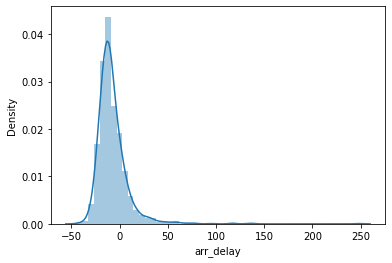

In [27]:
sns.distplot(df['arr_delay'])

In [28]:
stat,p = stats.shapiro(df['arr_delay'][df['arr_delay'] < 150])
stat, p

(0.7837050557136536, 1.2124034313338317e-40)

In [29]:
stats.trim_mean(df['arr_delay'], 0.20)

-10.16093229744728

### ^^^ The Distribution is not normal (without outliers)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [38]:
connection,cursor = open_connection(params)

months = [] # Will be a list of DataFrames!!              CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly
i='00'
for mon in range(1,13):
    print('working...')
    if mon < 10:
        i = '0' + str(mon)  # need to format single digits from '1' -> '01'    This can be changed but i forget offhand the SQL wildcard CHar for any OR NONE characters
    else:
        i = str(mon)
    query = f'''
    SELECT * FROM flights 
    WHERE fl_date LIKE '____-{i}%'
    ORDER BY random()
    LIMIT 300;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    month.dropna(subset=['fl_date','dep_time'], inplace=True)
    months.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
working...
Connection closed, operation completed


In [39]:
file_months_flights = open('flights_months.obj', 'wb')
pickle.dump(months, file_months_flights)

In [40]:
file_handler1 = open('flights_months.obj', 'rb')
months = pickle.load(file_handler1)

In [41]:
months[0].head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,1791,WN,N7738A,1791,10423,AUS,...,872.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
1,2019-01-20,AA,AA,AA,2064,AA,N979UY,2064,11697,FLL,...,632.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-01-24,AS,AS,AS,39,AS,N409AS,39,13487,MSP,...,1399.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-01-30,AS,AS,AS,904,AS,N303AS,904,14747,SEA,...,987.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
4,2019-01-10,UA,UA,UA,2377,UA,N39423,2377,12266,IAH,...,862.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
5,2019-01-26,UA,UA,UA,740,UA,N428UA,740,11292,DEN,...,1062.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
6,2019-01-03,AA,AA_CODESHARE,AA,4576,YX,N422YX,4576,12953,LGA,...,888.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
7,2018-01-31,WN,WN,WN,5809,WN,N413WN,5809,12892,LAX,...,236.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
8,2018-01-28,DL,DL_CODESHARE,DL,6062,YX,N205JQ,6062,12953,LGA,...,184.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
9,2019-01-25,UA,UA_CODESHARE,UA,5767,OO,N952SW,5767,13502,MTJ,...,196.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

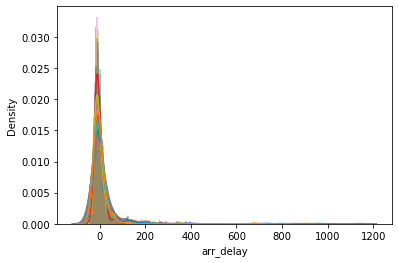

In [13]:
for month in months:
    sns.distplot(month['arr_delay'])

In [14]:
for i in range(12):
    print('month', i, 'mean:', stats.trim_mean(months[i]['arr_delay'], 0.20))  # trim_mean removes the N percent of either tails, in this case 20% to deal with outliers (then calculates mean)

print()  

for i in range(12):
    print('month', i, 'median', np.median(stats.trimboth(months[i]['arr_delay'], 0.20)))      # median must be called as np.median(data), so trim_both only performs a trim

month 0 mean: -5.853932584269663
month 1 mean: -5.137142857142857
month 2 mean: -5.685393258426966
month 3 mean: -6.776536312849162
month 4 mean: -3.5977011494252875
month 5 mean: -1.5112359550561798
month 6 mean: -4.948275862068965
month 7 mean: -3.303370786516854
month 8 mean: -7.4581005586592175
month 9 mean: -4.151685393258427
month 10 mean: -4.292817679558011
month 11 mean: -5.2555555555555555

month 0 median -7.0
month 1 median -6.0
month 2 median -7.0
month 3 median -8.0
month 4 median -5.0
month 5 median -3.0
month 6 median -7.0
month 7 median -5.0
month 8 median -9.0
month 9 median -5.0
month 10 median -7.0
month 11 median -6.0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [45]:
import os
API_key = os.environ.get('WWO_API_key')  # Make Sure you make your own API key to try, if we share it will probably run out of daily limit too soon

In [47]:
month_df = months[0]
month_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,WN,WN,WN,1791,WN,N7738A,1791,10423,AUS,...,872.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
1,2019-01-20,AA,AA,AA,2064,AA,N979UY,2064,11697,FLL,...,632.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-01-24,AS,AS,AS,39,AS,N409AS,39,13487,MSP,...,1399.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-01-30,AS,AS,AS,904,AS,N303AS,904,14747,SEA,...,987.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
4,2019-01-10,UA,UA,UA,2377,UA,N39423,2377,12266,IAH,...,862.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2018-01-03,WN,WN,WN,5989,WN,N449WN,5989,10423,AUS,...,189.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
296,2019-01-16,AA,AA,AA,1788,AA,N563UW,1788,11057,CLT,...,544.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
297,2018-01-18,DL,DL_CODESHARE,DL,3799,9E,N349PQ,3799,11423,DSM,...,533.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
298,2018-01-15,DL,DL,DL,1178,DL,N952DL,1178,14524,RIC,...,481.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None


In [48]:
# Finds correct index for WWO json for the right 3 hour period, in order to find weather description

# parameters(time (h,m))   returns (index(int))
def decide_time(time):
    if time[:-2] == '':
        h = 0
    else:
        h = int(time[:-2])
    # try:
    m = int(time[-2:])
    # except:
    #     print("ERROR: m is", time[-2:], '!!!')
        
    if m > 30 & h != 23:  # averages the hour up using minutes, unless it rolls over to next day (past 2400)
        h+1
    if h >= 21:
        return 7
    elif h >= 18:
        return 6
    elif h >= 15:
        return 5
    elif h >= 12:
        return 4
    elif h >= 9:
        return 3
    elif h >= 6:
        return 2
    elif h >= 3:
        return 1
    else:
        return 0   # Probably the worst function I've ever wrote, don't know python well enough to make this concise (enumerate instead?)

In [49]:
airports = pd.read_csv('airports.csv')  # found a database of airports, so with airport IATA code i can get the lat,lon coords for the actual weather around that airport
                                        # not just the whole city. Link to the database: https://davidmegginson.github.io/ourairports-data/airports.csv
def get_latlon(df):                     
    
    IATA = df.loc[0]['origin']          
    latlon = airports[airports['iata_code']==IATA][['latitude_deg','longitude_deg']].values[0]

    return latlon

In [50]:
# def get_montly_weathers(months):
#     for df in months:
#         dep_datetime = get_dep_datetime(df)
#         lat,lon = get_latlon(df)

#         url = f"http://api.worldweatheronline.com/premium/v1/weather.ashx?key={API_key}&q={lat},{lon}&num_of_days=1&format=json"
#         data = requests.get(url).json()
#         weather = data['data']['current_condition'][0]['weatherDesc'][0]['value']
#         weather 

In [51]:
def get_weatherDesc(row):
    date, time = row.loc['fl_date'], str(row.loc['dep_time'])[:-2]
    lat,lon = get_latlon(df)
    time_cursor = decide_time(time)
    
    url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={API_key}&q={lat},{lon}&date={date}&num_of_days=1&format=json"
    data = requests.get(url).json()
    data

    weather = data['data']['weather'][0]['hourly'][time_cursor]['weatherDesc'][0]['value']
    return weather 

In [52]:
for i in range(len(months)):
    print("Working", end='')
    for index,row in months[i].head(10).iterrows():
        print('.', end='')
        months[i].loc[index, 'dep_weather'] = get_weatherDesc(row)
    print()
print("Done!")

Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Working..........
Done!


In [53]:
file_months_weather = open('flights_wmonths.obj', 'wb')
pickle.dump(months, file_months_weather)

In [54]:
file_handler2 = open('flights_wmonths.obj', 'rb')
wmonths = pickle.load(file_handler2)

In [56]:
wmonths[0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,dep_weather
0,2018-01-01,WN,WN,WN,1791,WN,N7738A,1791,10423,AUS,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None,Partly cloudy
1,2019-01-20,AA,AA,AA,2064,AA,N979UY,2064,11697,FLL,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,Blowing snow
2,2019-01-24,AS,AS,AS,39,AS,N409AS,39,13487,MSP,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,Overcast
3,2018-01-30,AS,AS,AS,904,AS,N303AS,904,14747,SEA,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None,Sunny
4,2019-01-10,UA,UA,UA,2377,UA,N39423,2377,12266,IAH,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2018-01-03,WN,WN,WN,5989,WN,N449WN,5989,10423,AUS,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None,NaN
296,2019-01-16,AA,AA,AA,1788,AA,N563UW,1788,11057,CLT,...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN
297,2018-01-18,DL,DL_CODESHARE,DL,3799,9E,N349PQ,3799,11423,DSM,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None,NaN
298,2018-01-15,DL,DL,DL,1178,DL,N952DL,1178,14524,RIC,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None,NaN


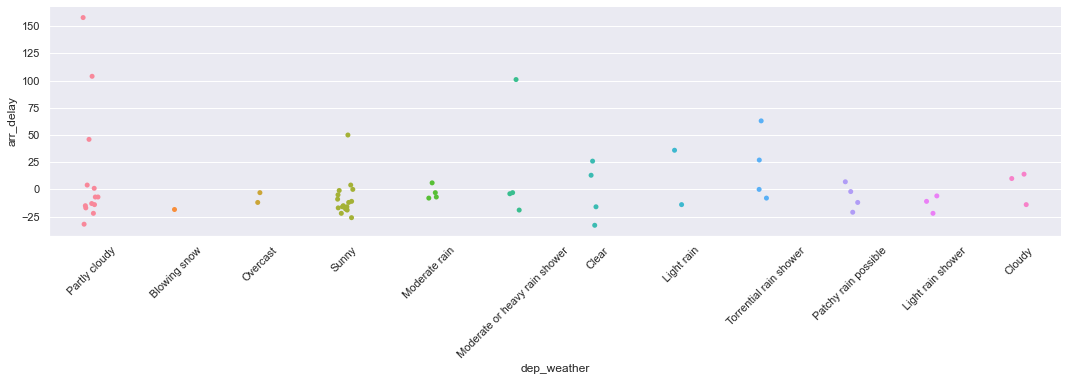

In [57]:
wdf = wmonths[0].head()

for i in range(1,len(wmonths)):
    wdf = wdf.append(wmonths[i].head(), ignore_index=True)
sns.set()
sns.catplot(x="dep_weather", y="arr_delay", data=wdf, height=4, aspect=15/4)
plt.xticks(rotation=45)
plt.show()

In [58]:
weather_count = Counter()

for condition in wdf['dep_weather'].unique():
    weather_count[condition] = wdf[(wdf['dep_weather']==condition) & (wdf['arr_delay']>0)]['arr_delay'].count()
    

for condition in wdf['dep_weather'].unique():
    print(condition,' percentage of delays: ', (weather_count[condition] / sum(weather_count.values()))*100, '%',sep='')

Partly cloudy percentage of delays: 29.411764705882355%
Blowing snow percentage of delays: 0.0%
Overcast percentage of delays: 0.0%
Sunny percentage of delays: 11.76470588235294%
Moderate rain percentage of delays: 5.88235294117647%
Moderate or heavy rain shower percentage of delays: 5.88235294117647%
Clear percentage of delays: 11.76470588235294%
Light rain percentage of delays: 5.88235294117647%
Torrential rain shower percentage of delays: 11.76470588235294%
Patchy rain possible percentage of delays: 5.88235294117647%
Light rain shower percentage of delays: 0.0%
Cloudy percentage of delays: 11.76470588235294%


### ^^^ Looks like sunny weather has the most delays - interesting. Not much correllation between bad weather and arrival delay

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [59]:
for month in months:
    month['taxi_time'] = month['taxi_in'] + month['taxi_out']

month_df['taxi_time']

0      27.0
1      28.0
2      62.0
3      30.0
4      20.0
       ... 
295    21.0
296    29.0
297    22.0
298    25.0
299    22.0
Name: taxi_time, Length: 294, dtype: float64

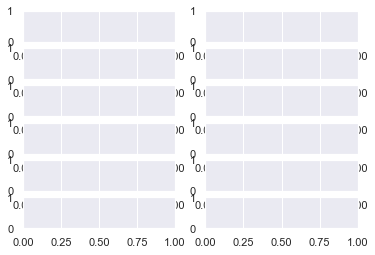

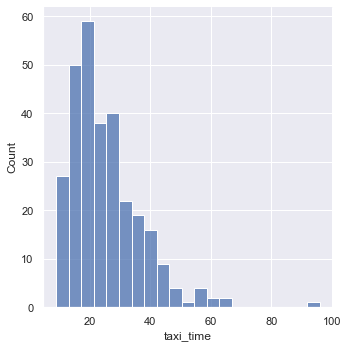

In [60]:
fig, axes = plt.subplots(nrows=6,ncols=2)

axes[0] = sns.displot(months[0]['taxi_time'], kind='hist', )   # This might be complicated to fix, but probably not

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [61]:
with_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] > 0)]['dep_delay'].count()
without_dep = df[(df['arr_delay'] > 0) & (df['dep_delay'] <= 0)]['dep_delay'].count()
total = (with_dep + without_dep)

print('Percentage of arrival delays with departure delay:   ', (with_dep/total)*100)
print('Percentage of arrival delays without departure delay:', (without_dep/total)*100)

Percentage of arrival delays with departure delay:    53.87323943661971
Percentage of arrival delays without departure delay: 46.12676056338028


                                   No surprise here ^^^

#### **Task 6**: How many states cover 50% of US air traffic? 

In [62]:
connection, cursor = open_connection(params)
query1 = 'SELECT origin, dest FROM flights ORDER BY random() LIMIT 1000;'

cursor.execute(query1)
data = cursor.fetchall()

connection.close()
print('Connection closed')

Connection was successful
Connection closed


In [63]:
df2 = pd.DataFrame(data, columns=['origin','dest'])
df2

,origin,dest
0,CVG,IAD
1,DEN,RDU
2,MYR,CLT
3,BOS,RSW
4,BWI,PWM
...,...,...
995,SDF,DTW
996,SAN,SFO
997,LIT,DFW
998,OKC,LAS


In [64]:
df2.to_csv('df2.csv', index=False)

In [65]:
# LOAD IN FROM HERE TO SAVE TIME

df2 = pd.read_csv('df2.csv')

In [66]:
df2

,origin,dest
0,CVG,IAD
1,DEN,RDU
2,MYR,CLT
3,BOS,RSW
4,BWI,PWM
...,...,...
995,SDF,DTW
996,SAN,SFO
997,LIT,DFW
998,OKC,LAS


In [67]:
state_count = Counter()

for IATA in df2['origin']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1
    
for IATA in df2['dest']:
    state = airports[airports['iata_code']==IATA]['iso_region'].values[0]
    state_count[state] += 1

In [68]:
del state_count['PR-U-A'] # drop Puerto Rico (unincorporated US territory)
del state_count['VI-U-A'] # drop US Virgin Islands (unincorporated US territory)


total = sum(state_count.values())
cmltv_per = 0 # cumulative percentage initialized to 0
state_lst = [] # cumulative state percentage initialized to empty


for region in state_count.most_common(): # region is tuple (US-MI, 274) of US state and the count of arrivals/departures in that state.
    percent = (region[1]/total)*100 #calc percentage
    print(region[0],'  ', percent) 
    if cmltv_per<50: #cumulative percentage
        cmltv_per += percent
        state_lst.append(region[0])

print(state_lst, round(cmltv_per, 3), "Number of states covering 50% of US air traffic:", len(state_lst))

US-CA    11.451531893520844
US-TX    10.447011551983927
US-FL    7.081868407835258
US-IL    6.529382219989954
US-NY    5.2737317930688095
US-GA    5.173279758915118
US-CO    4.31943746860874
US-NC    4.068307383224511
US-WA    3.214465092918132
US-DC    3.214465092918132
US-MI    2.812656956303365
US-AZ    2.6117528879959817
US-NV    2.6117528879959817
US-MN    2.4610748367654445
US-HI    2.260170768458061
US-UT    2.0090406830738323
US-PA    2.0090406830738323
US-TN    1.8583626318432949
US-MA    1.757910597689603
US-OH    1.55700652938222
US-NJ    1.4565544952285283
US-MO    1.4565544952285283
US-MD    1.255650426921145
US-KY    1.2054244098442994
US-SC    1.054746358613762
US-OR    0.9542943244600702
US-LA    0.9542943244600702
US-IN    0.8538422903063787
US-VA    0.8538422903063787
US-WI    0.7031642390758412
US-AL    0.6027122049221497
US-AK    0.6027122049221497
US-CT    0.5524861878453038
US-AR    0.45203415369161226
US-WV    0.45203415369161226
US-OK    0.4018081366147665
US-IA

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [69]:
iata_count = Counter()

for IATA in df2['origin']:    # Count all flights with origin or destination having a specific airport IATA code
    iata_count[IATA] += 1
for IATA in df2['dest']:
    iata_count[IATA] += 1
    
top_airports = iata_count.most_common()[:10] # 10 most common
top_iatas = [i[0] for i in top_airports]
top_airports

[('ORD', 104),
 ('ATL', 95),
 ('DFW', 84),
 ('DEN', 79),
 ('LAX', 62),
 ('CLT', 59),
 ('SEA', 51),
 ('SFO', 47),
 ('MSP', 47),
 ('LGA', 47)]

In [70]:
top_iatas

['ORD', 'ATL', 'DFW', 'DEN', 'LAX', 'CLT', 'SEA', 'SFO', 'MSP', 'LGA']

In [71]:
total = sum(iata_count.values())
cmltv_per = 0

for airport in top_iatas: # region is tuple (IATA, 111) of airport code and the count of arrivals/departures in that airport.
    percent = (iata_count[airport]/total)*100 #calc percentage
    cmltv_per += percent
    print(airport,'  ', percent) 
print("\nTotal coverage: ", cmltv_per, '%', sep='')

ORD    5.2
ATL    4.75
DFW    4.2
DEN    3.95
LAX    3.1
CLT    2.9499999999999997
SEA    2.55
SFO    2.35
MSP    2.35
LGA    2.35

Total coverage: 33.75%


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [72]:
# for month in months: # Something like this i think? for first three bullets?
#     print(month['']) # Do something with sum()/(rows-with-delays)

In [73]:
del_count = Counter()

for month in months:
    delay_df = month[['mkt_carrier','arr_delay']][month['arr_delay']>0].groupby('mkt_carrier').sum()
    carriers,delay = delay_df.index, delay_df['arr_delay']
    del_count += dict(zip(carriers,delay))
    
del_count

Counter({'AA': 11549.0,
         'AS': 2196.0,
         'B6': 2947.0,
         'DL': 9275.0,
         'F9': 1069.0,
         'G4': 770.0,
         'HA': 189.0,
         'NK': 1205.0,
         'UA': 13029.0,
         'VX': 298.0,
         'WN': 6975.0})

In [74]:
connection,cursor = open_connection(params)

query =  "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'fuel_comsumption';"
cursor.execute(query)
columns = cursor.fetchall()
columns = [col[0]for col in columns ]

fuel_months_df = [] # Will be a list of DataFrames!!       CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly

for i in range(1,13): # months
    query = f'''
    SELECT * FROM fuel_comsumption
    WHERE month = {i}
    ORDER BY random()
    LIMIT 15;;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    # month.dropna(subset=['fl_date','dep_time'], inplace=True)
    fuel_months_df.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
Connection closed, operation completed


In [75]:
file_fuel_months = open('flights_fuel_months.obj', 'wb')
pickle.dump(fuel_months_df, file_fuel_months)

In [76]:
file_handler3 = open('flights_fuel_months.obj', 'rb')
fuel_months_df = pickle.load(file_handler3)

In [77]:
fuel_months_df[0].head(5)

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,21650.0,EE,EE,Eastern Airlines Group Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,280325.0,528142.0,808467.0,2017
1,1,19690.0,HA,HA,Hawaiian Airlines Inc.,3,15104660.0,0.0,7316195.0,0.0,...,29872091.0,0.0,14224772.0,0.0,14224772.0,44096863.0,29894018.0,14224772.0,44118790.0,2018
2,1,20416.0,NK,NK,Spirit Air Lines,3,17117251.0,0.0,0.0,1923270.0,...,34434751.0,0.0,0.0,3869039.0,3869039.0,38303790.0,34434751.0,3869039.0,38303790.0,2015
3,1,20397.0,OH,OH,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
4,1,20169.0,L2,L2,Lynden Air Cargo Airlines,1,96124.0,0.0,0.0,0.0,...,209803.0,0.0,0.0,0.0,0.0,209803.0,425821.0,75490.0,501311.0,2019


In [78]:
month = fuel_months_df[0]
month

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,21650.0,EE,EE,Eastern Airlines Group Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,280325.0,528142.0,808467.0,2017
1,1,19690.0,HA,HA,Hawaiian Airlines Inc.,3,15104660.0,0.0,7316195.0,0.0,...,29872091.0,0.0,14224772.0,0.0,14224772.0,44096863.0,29894018.0,14224772.0,44118790.0,2018
2,1,20416.0,NK,NK,Spirit Air Lines,3,17117251.0,0.0,0.0,1923270.0,...,34434751.0,0.0,0.0,3869039.0,3869039.0,38303790.0,34434751.0,3869039.0,38303790.0,2015
3,1,20397.0,OH,OH,PSA Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
4,1,20169.0,L2,L2,Lynden Air Cargo Airlines,1,96124.0,0.0,0.0,0.0,...,209803.0,0.0,0.0,0.0,0.0,209803.0,425821.0,75490.0,501311.0,2019
5,1,20368.0,G4,G4,Allegiant Air,3,11716758.0,0.0,0.0,0.0,...,14906048.0,0.0,0.0,0.0,0.0,14906048.0,15650180.0,0.0,15650180.0,2016
6,1,20500.0,G7,G7,GoJet Airlines LLC d/b/a United Express,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
7,1,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015
8,1,20310.0,WL,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan...",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52700.0,309033.0,361733.0,2015
9,1,20368.0,G4,G4,Allegiant Air,2,10111041.0,0.0,0.0,0.0,...,19132987.0,0.0,0.0,0.0,0.0,19132987.0,20000259.0,0.0,20000259.0,2015


In [79]:
month[['total_gallons','carrier','carrier_name']].sort_values('total_gallons',ascending=False)

,total_gallons,carrier,carrier_name
11,60969000.0,5X,United Parcel Service
1,22432193.0,HA,Hawaiian Airlines Inc.
2,19040521.0,NK,Spirit Air Lines
5,12264170.0,G4,Allegiant Air
9,10542221.0,G4,Allegiant Air
0,427760.0,EE,Eastern Airlines Group Inc.
4,199796.0,L2,Lynden Air Cargo Airlines
8,188404.0,K8,"Caribbean Sun Airlines, Inc. d/b/a World Atlan..."
13,140872.0,KLQ,Kalitta Charters II
3,0.0,OH,PSA Airlines Inc.
